### Lesson outline
Pandas makes it very convenient to compute various statistics on a dataframe:

+ Global statistics: mean, median, std, sum, etc. [more](https://docs.scipy.org/doc/numpy/reference/routines.math.html)
+ Rolling statistics: rolling_mean, rolling_std, etc. [more](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats)
You will use these functions to analyze stock movement over time.  

Specifically, you will compute:

+ Bollinger Bands: A way of quantifying how far stock price has deviated from some norm.
+ Daily returns: Day-to-day change in stock price.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#utility functions
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)# 1create empty df for designated date
    
    if 'SPY' not in symbols:  # 2add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp=pd.read_csv(symbol_to_path(symbol, base_dir="data"), # 3read in data from the symbol
                           index_col='Date',
                           parse_dates=True,
                           usecols=['Date','Adj Close'],
                           na_values=['nan'])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})       # 4rename the adjust close column to the symbol name
        df=df.join(df_temp) 
        if symbol =='SPY':#5drop rows where SPY is na/ensure SPY is used as a reference-we don't have na values in the spy column
            df=df.dropna(subset=['SPY'])
    return df

def normalize_data(df):
    return df/df.ix[0,:]

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    plot_data(df.ix[start_index:end_index,columns],title='Selected data')

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

### Global Statistics

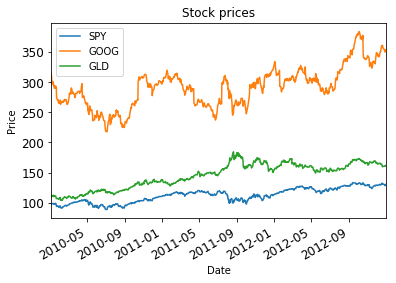

                  SPY        GOOG         GLD
2010-01-04  97.788948  313.062468  109.800003
2010-01-05  98.047805  311.683844  109.699997


In [3]:
import pandas as pd
import numpy as np

dates=pd.date_range('2010-01-01','2012-12-31')
symbols=['SPY','GOOG','GLD']
df=get_data(symbols,dates)
plot_data(df)
print df.head(2)

In [4]:
print df.mean()
print df.median()
print df.std()

SPY     112.283159
GOOG    290.865224
GLD     145.029775
dtype: float64
SPY     113.344118
GOOG    292.365629
GLD     150.294998
dtype: float64
SPY     11.663356
GOOG    33.101322
GLD     20.897316
dtype: float64


### Rolling statistics
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.rolling_mean.html)  
[rolling_mean](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.rolling_mean.html)    
[rolling_std](http://pandas.pydata.org/pandas-docs/stable/computation.html?highlight=rolling%20statistics#moving-rolling-statistics-moments)     



The rolling mean has the initial value:   
As we define a window period of 20 days, the first 20 days are no rolling mean values

2012-01-03           NaN
2012-01-04           NaN
2012-01-05           NaN
2012-01-06           NaN
2012-01-09           NaN
2012-01-10           NaN
2012-01-11           NaN
2012-01-12           NaN
2012-01-13           NaN
2012-01-17           NaN
2012-01-18           NaN
2012-01-19           NaN
2012-01-20           NaN
2012-01-23           NaN
2012-01-24           NaN
2012-01-25           NaN
2012-01-26           NaN
2012-01-27           NaN
2012-01-30           NaN
2012-01-31    116.828006
2012-02-01    117.051225
2012-02-02    117.274893
2012-02-03    117.566830
2012-02-06    117.869545
2012-02-07    118.173608
2012-02-08    118.445782
2012-02-09    118.722448
2012-02-10    118.940278
2012-02-13    119.233113
2012-02-14    119.495856
                 ...    
2012-11-16    128.022093
2012-11-19    127.717123
2012-11-20    127.525662
2012-11-21    127.345142
2012-11-23    127.341951
2012-11-26    127.343318
2012-11-27    127.293174
2012-11-28    127.298189
2012-11-29    127.333290


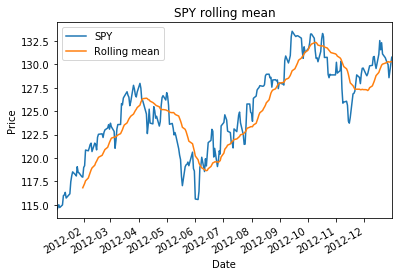

In [5]:
#read data
dates=pd.date_range('2012-01-01','2012-12-31')
symbols=['SPY']
df=get_data(symbols,dates)

#plot SPY data, retain matplotlib axis object
ax=df['SPY'].plot(title='SPY rolling mean',label='SPY')
#Compute rolling mean using a 20 day window
rm_SPY=df['SPY'].rolling(window=20,center=False).mean()
print rm_SPY
#Adding rolling mean to same plot
rm_SPY.plot(label='Rolling mean',ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

###  Calculate Bollinger Bands

In [6]:
def get_bollinger_bands(rm,rstd):
    upper_band=rm+2*rstd
    lower_band=rm-2*rstd
    return upper_band,lower_band

def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling( window=window,center=False).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return values.rolling(window=window,center=False).std()


In [7]:
#read data
dates=pd.date_range('2012-01-01','2012-12-31')
symbols=['SPY']
df=get_data(symbols,dates)

# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['SPY'], window=20)
# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['SPY'], window=20)
# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    

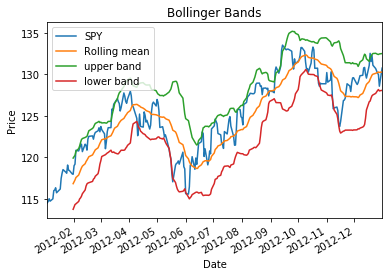

In [8]:
#Plot raw SPY values, rolling ,ean and Bollinger Bands
df['SPY']
ax=df['SPY'].plot(title='Bollinger Bands',
                 label='SPY')
rm_SPY.plot(label='Rolling mean',ax=ax)
upper_band.plot(label='upper band',ax=ax)
lower_band.plot(label='lower band',ax=ax)
#Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')
plt.show()

### Daily returns
how much did the price go up or down in a particular day   
a line that sort of zigs and zags, close to 0  
Compare
daily_return[t]=(price[t[/price[t-1])-1

In [8]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns=df.copy()
    daily_returns[1:]=(df[1:]/df[:-1].values)-1
    daily_returns.iloc[0,:]=0
    return daily_returns

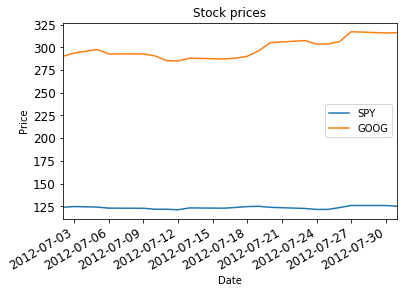

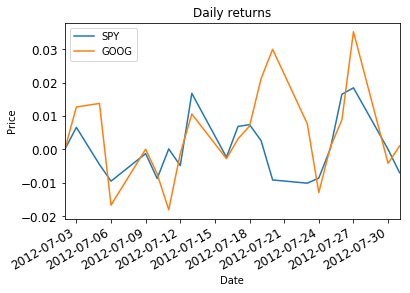

In [9]:
def test_run():    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','GOOG']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns")
    
test_run()

### Cumulative returns
normalization equation:  
cumret[t]=(price[t]/price[0])-1